# 11. час: Учитавање табела из локалних датотека и из удаљених ресурса

На овом часу ћемо говорити о:
1. учитавању података из табела које су припремљене у формату _CSV_;
2. учитавање података из удањених ресурса; и
3. транспоновање табеле.

## 11.1. Учитавање података из локалних _CSV_ датотека

Видели смо у претходним примерима да се најмукотрпнији посао обраде података састоји у томе да се подаци унесу у табелу. То је досадан посао који се често састоји у томе да се подаци просто прекуцају. Табеле са којима смо се сретали су зато биле веома мале. Модерна обрада података се, међутим, све више усмерава на анализу _огромних_ количина података (енгл. _big data_) и ту прекуцавање података не долази у обзир.

Подаци се данас углавном прикупљају аутоматски, и програми за прикупљање података генеришу велике табеле података које после треба обрађивати. Постоје разни формати за табеларно представљање података, а најједноставнији од њих се зове _CSV_, (од енгл. _comma separated values_ што значи "вредности раздвојене зарезима").

_CSV_ датотека је текстуална датотека у којој редови одговарају редовима табеле, а подаци унутар истог реда су раздвојени зарезима. На пример, у фолдеру _podaci_ се налази датотека _StanovnistvoSrbije2017.csv_ која изгледа овако:

    Старост,Мушко,Женско
    0,33145,31444
    1,33252,31105
    2,33807,31475
    3,34076,31952
    4,33436,31643
    5,34278,32505
    6,33773,31523
    7,33892,32185
    8,34706,32396
    9,34519,32177
    10,34017,32064
    11,34947,33251
    ... (итд) ...
    84,11450,18529
    85 и више,44817,78323

Ова табела садржи процену броја становника Републике Србије по годинама на дан 31.12.2017. Први ред табеле представља заглавље табеле које нам каже да табела има три колоне (Старост, Мушко, Женско). Врста

    7,33892,32185

значи да се процењује да је 31.12.2017. у Србији било 33.892 седмогодишњих дечака и 32.185 седмогодишњих девојчица.

Библиотека `pandas` има функцију `read_csv` која учитава _CSV_ датотеку и од ње прави табелу типа _DataFrame_. Ево примера:

In [1]:
import pandas as pd
stanovnistvo = pd.read_csv("podaci/StanovnistvoSrbije2017.csv")

Пошто је табела велика, приказаћемо само првих неколико редова. Функција `head(N)` приказује првих N редова табеле (енгл. _head_ значи "глава"):

In [2]:
stanovnistvo.head(5)

,Старост,Мушко,Женско
0,0,33145,31444
1,1,33252,31105
2,2,33807,31475
3,3,34076,31952
4,4,33436,31643


Функција `tail(N)` приказује последњих N редова табеле (енгл. _tail_ значи "реп"):

In [3]:
stanovnistvo.tail(5)

,Старост,Мушко,Женско
81,81,16552,25345
82,82,15025,23036
83,83,13522,21435
84,84,11450,18529
85,85 и више,44817,78323


Табелу ћемо индексирати колоном "Старост":

In [4]:
stanovnistvo1 = stanovnistvo.set_index("Старост")
stanovnistvo1.head(5)

,Мушко,Женско
Старост,,
0,33145,31444
1,33252,31105
2,33807,31475
3,34076,31952
4,33436,31643


In [5]:
stanovnistvo1.tail(5)

,Мушко,Женско
Старост,,
81,16552,25345
82,15025,23036
83,13522,21435
84,11450,18529
85 и више,44817,78323


## 11.2. Учитавање података из удаљених ресурса

Могуће је преузети и податке са удањених ресурса без потребе да се они прво пребаце на локалну машину. Да бисмо приступили податку који се налази на некој другој машини потребно је да обе машине имају приступ Интернету и да знамо тачну локацију податка на удањеној машини. Тачна локација било ког ресурса на Интернету је описана његовим _URL_-ом (од енгл. _Universal Resource Locator_, што значи "Универзални локатор ресурса").

На адреси

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
се налази јавно доступан списак свих држава на свету. Ову табелу можемо лако учитати наредбом `read_csv`:

In [6]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.head(10)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


Помоћу наредбе `read_html` може се прочитати и табела дирекнто из _HTML_ кода неке веб странице. Рецимо, следећа наредба чита списак свих федералних јединица Сједињених Америчких Држава са одговарајуће странице Википедије:

In [7]:
US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=0)[0]

Наредба `read_html` враћа релативно сложену структуру, али табела коју желимо да видимо је прва у тој структури. Зато иза наредбе следи конструкт `[0]` који враћа прву компоненту сложене структуре. Аргумент `header=0` значи да прву врсту треба узети за заглавље табеле. Ево како изгледа табела:

In [8]:
US

,Sl no.,Abbreviations,State Name,Capital,Became a State
0,1,AL,Alabama,Montgomery,"December 14, 1819"
1,2,AK,Alaska,Juneau,"January 3, 1959"
2,3,AZ,Arizona,Phoenix,"February 14, 1912"
3,4,AR,Arkansas,Little Rock,"June 15, 1836"
4,5,CA,California,Sacramento,"September 9, 1850"
5,6,CO,Colorado,Denver,"August 1, 1876"
6,7,CT,Connecticut,Hartford,"January 9, 1788"
7,8,DE,Delaware,Dover,"December 7, 1787"
8,9,FL,Florida,Tallahassee,"March 3, 1845"
9,10,GA,Georgia,Atlanta,"January 2, 1788"


## 11.3. Транспоновање табеле

Замена врста и колона табеле се зове _транспоновање_. Приликом транспоновања имена колона полазне табеле постају индекси нове табеле, док индексна колона полазне табеле постаје одређује имена колона нове табеле:

Транспоновање се често користи када табела има мало веома дугачких редова, па је у неким ситуацијама лакше посматрати транспоновану табелу која онда има пуно релативно кратких редова. Функције `head` и `tail` нам тада омогућују да се брзо упознамо са почетком и крајем табеле и да стекнемо неку интуицију о томе како табела изгледа.

Важно је рећи и то да се са табелама може радити и без транспоновања, јер све што можемо да урадимо на колонама табеле можемо да урадимо и на врстама. И поред тога, транспоновање се често користи јер је библиотека `pandas` оптимизована за рад по колонама табеле.

Табела се транспонује тако што се на њу примени функција `Т` која као резултат враћа нову, транспоновану табелу.

<img src = "slike/DataFrame-T.jpg">

Ево примера са оценама:

In [9]:
razred = [["Ана",     5, 3, 5, 2, 4, 5],
          ["Бојан",   5, 5, 5, 5, 5, 5],
          ["Влада",   4, 5, 3, 4, 5, 4],
          ["Гордана", 5, 5, 5, 5, 5, 5],
          ["Дејан",   3, 4, 2, 3, 3, 4],
          ["Ђорђе",   4, 5, 3, 4, 5, 4],
          ["Елена",   3, 3, 3, 4, 2, 3],
          ["Жаклина", 5, 5, 4, 5, 4, 5],
          ["Зоран",   4, 5, 4, 4, 3, 5],
          ["Ивана",   2, 2, 2, 2, 2, 5],
          ["Јасна",   3, 4, 5, 4, 5, 5]]
ocene = pd.DataFrame(razred)
ocene.columns=["Име", "Српски", "Енглески", "Математика", "Физика", "Хемија", "Ликовно"]
ocene1 = ocene.set_index("Име")
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно
Име,,,,,,
Ана,5,3,5,2,4,5
Бојан,5,5,5,5,5,5
Влада,4,5,3,4,5,4
Гордана,5,5,5,5,5,5
Дејан,3,4,2,3,3,4
Ђорђе,4,5,3,4,5,4
Елена,3,3,3,4,2,3
Жаклина,5,5,4,5,4,5
Зоран,4,5,4,4,3,5


Транспоновану табелу добијамо овако:

In [10]:
ocene2 = ocene1.T
ocene2

Име,Ана,Бојан,Влада,Гордана,Дејан,Ђорђе,Елена,Жаклина,Зоран,Ивана,Јасна
Српски,5,5,4,5,3,4,3,5,4,2,3
Енглески,3,5,5,5,4,5,3,5,5,2,4
Математика,5,5,3,5,2,3,3,4,4,2,5
Физика,2,5,4,5,3,4,4,5,4,2,4
Хемија,4,5,5,5,3,5,2,4,3,2,5
Ликовно,5,5,4,5,4,4,3,5,5,5,5


Хајде још да се уверимо да су врсте и колоне замениле места и у пољима `index` и `columns`. У полазној табели је:

In [11]:
ocene1.index

Index(['Ана', 'Бојан', 'Влада', 'Гордана', 'Дејан', 'Ђорђе', 'Елена',
       'Жаклина', 'Зоран', 'Ивана', 'Јасна'],
      dtype='object', name='Име')

In [12]:
ocene1.columns

Index(['Српски', 'Енглески', 'Математика', 'Физика', 'Хемија', 'Ликовно'], dtype='object')

А у транспонованој табели је:

In [13]:
ocene2.index

Index(['Српски', 'Енглески', 'Математика', 'Физика', 'Хемија', 'Ликовно'], dtype='object')

In [14]:
ocene2.columns

Index(['Ана', 'Бојан', 'Влада', 'Гордана', 'Дејан', 'Ђорђе', 'Елена',
       'Жаклина', 'Зоран', 'Ивана', 'Јасна'],
      dtype='object', name='Име')

Како смо раније већ видели, просек оцена по предметима добијамо лако:

In [15]:
for predmet in ocene1.columns:
    print(predmet, "->", ocene1[predmet].mean())

Српски -> 3.909090909090909
Енглески -> 4.181818181818182
Математика -> 3.727272727272727
Физика -> 3.8181818181818183
Хемија -> 3.909090909090909
Ликовно -> 4.545454545454546


Да бисмо добили просек оцена по ученицима, можемо да приступимо врстама табеле користећи функцију `loc` како смо то већ видели, али можемо и да употребимо транспоновану табелу (рачунање просека по колонама, јер су колоне транспоноване табеле заправо врсте полазне табеле):

In [16]:
for ucenik in ocene2.columns:
    print(ucenik, "->", ocene2[ucenik].mean())

Ана -> 4.0
Бојан -> 5.0
Влада -> 4.166666666666667
Гордана -> 5.0
Дејан -> 3.1666666666666665
Ђорђе -> 4.166666666666667
Елена -> 3.0
Жаклина -> 4.666666666666667
Зоран -> 4.166666666666667
Ивана -> 2.5
Јасна -> 4.333333333333333


Често се дешава да табела са подацима нема заглавље. Тада се приликом учитавања то мора нагласити функцији `read_csv` тако што се наведе `header = None`.

На пример, у фолдеру _podaci_ се налази датотека _TemperaturneAnomalije.csv_ која садржи податке о томе за колико степени Целзијуса је средња измерена температура на Земљи већа од оптималне у последњих 40 година. Ова табела има два дугачка реда који изгледају овако:

    1977,1978,1979,1980,1981,...
    0.22,0.14,0.15,0.3,0.37,...

У првом реду се налазе годину (1977--2017), а у другом измерена температурна аномалија. Видимо да табела нема заглавље. Зато ћемо је учитати на следећи начин:

In [17]:
temp_anomalije = pd.read_csv("podaci/TemperaturneAnomalije.csv", header = None)
temp_anomalije

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1977.00,1978.00,1979.00,1980.0,1981.00,1982.00,1983.0,1984.00,1985.00,1986.00,...,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.0,2017.00
1,0.22,0.14,0.15,0.3,0.37,0.15,0.4,0.23,0.14,0.28,...,0.48,0.59,0.77,0.55,0.56,0.62,0.71,0.85,1.1,0.92


Да бисмо добили податке у облику који се лакше обрађује транспоноваћемо табелу и колонама тако транспоноване табеле дати одговарајућа имена.

In [18]:
temp_anomalije1 = temp_anomalije.T
temp_anomalije1.columns = ["Година", "Аномалија"]

Ево првих неколико редова табеле:

In [19]:
temp_anomalije1.head(10)

,Година,Аномалија
0,1977.0,0.22
1,1978.0,0.14
2,1979.0,0.15
3,1980.0,0.30
4,1981.0,0.37
5,1982.0,0.15
6,1983.0,0.40
7,1984.0,0.23
8,1985.0,0.14
9,1986.0,0.28


Табелу ћемо индексирати колоном "Година":

In [20]:
temp_anomalije2 = temp_anomalije1.set_index("Година")
temp_anomalije2.head(5)

,Аномалија
Година,
1977.0,0.22
1978.0,0.14
1979.0,0.15
1980.0,0.30
1981.0,0.37


Приказаћемо температурне аномалије дијаграмом:

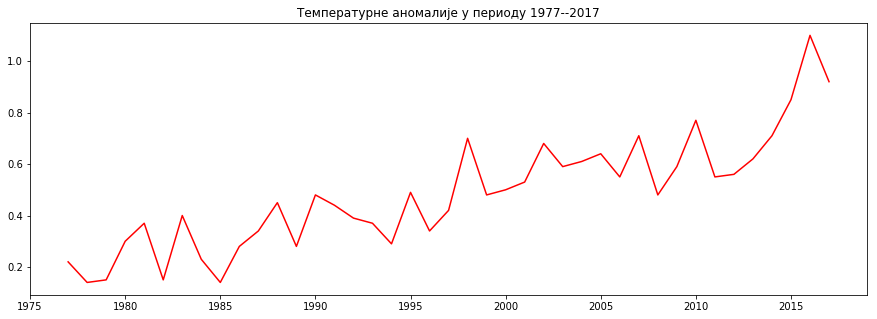

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(temp_anomalije2.index, temp_anomalije2["Аномалија"], color="r")
plt.title("Температурне аномалије у периоду 1977--2017")
plt.show()
plt.close()

## 11.4. Задаци

**Задатак 1.** У фолдеру _podaci_ се налази датотека _StanovnistvoSrbije2017.csv_ (која има заглавље). Табела има три колоне које се зову "Старост", "Мушко" и "Женско".

_(а)_ Учитај датотеку у структуру података _DataFrame_ и индексирај табелу колоном "Старост".

_(б)_ Прикажи процењени број мушкараца и жена по старости линијским дијаграмом.

**Задатак 2.** Ученици једног разреда су скакали у даљ. Сваки ученик је скако три пута и резултати су дати у датотеци _SkokUDalj.csv_ која се налази у фолдеру _podaci_. Табела има заглавље и састоји се од четири колоне: "Презиме и име", "Скок1", "Скок2" и "Скок3".

_(а)_ Учитај датотеку у структуру података _DataFrame_.

_(б)_ Прикажи ове податке линијским дијаграмом који ће имати три линије -- за сваки скок по једна. Дијаграм треба да има легенду.

**Задатак 3.** На адреси

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

се налази јавно доступна табела са списком држава света и неким параметрима економског развоја тих држава праћеним у интервалима од 5 година.

Табела има следеће колоне:

* country = држава
* year = година на коју се односе подаци
* pop = број становника (енгл. _population_)
* continent = континент
* lifeExp = очекивани животни век у годинама (енгл. _life expextancy_)
* gdpPercap = БДП по глави становника у америчким доларима (енгл. _GDP per capitem_)

Учитај ову табелу у структуру података _DataFrame_ и прикажи првих 20 редова табеле, као и последњих 10 редова табеле.